In [2]:
#Data quality and data exploration of an credit card dataset 
#EDA

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from google.colab import drive
import matplotlib
color = sns.color_palette()

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.offline as offline
offline.init_notebook_mode()
import cufflinks as cf
cf.go_offline()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
#reading csv files
app = pd.read_csv("Application.csv")
# app.head()
app.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [4]:
print(app.shape)
print(app.describe())

(15375, 122)
          SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   15375.000000  15375.000000  15375.000000      1.537500e+04   
mean   277395.768780      0.080715      0.416195      1.671849e+05   
std    102223.521868      0.272406      0.715373      9.348787e+04   
min    100046.000000      0.000000      0.000000      2.700000e+04   
25%    189310.500000      0.000000      0.000000      1.125000e+05   
50%    276480.000000      0.000000      0.000000      1.462500e+05   
75%    364862.500000      0.000000      1.000000      2.025000e+05   
max    456229.000000      1.000000     12.000000      2.250000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.537500e+04   15375.000000     1.536100e+04   
mean   5.934260e+05   26931.572780     5.330947e+05   
std    3.970607e+05   14357.729722     3.640635e+05   
min    4.500000e+04    2628.000000     4.500000e+04   
25%    2.700000e+05   16456.500000     2.385000e+05   
50%    5.094000e+05   2481

In [5]:
# checking missing data
total = app.isnull().sum().sort_values(ascending = False)
percent = (app.isnull().sum()/app.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MODE,10752,69.931707
COMMONAREA_AVG,10752,69.931707
COMMONAREA_MEDI,10752,69.931707
NONLIVINGAPARTMENTS_MODE,10679,69.456911
NONLIVINGAPARTMENTS_AVG,10679,69.456911
NONLIVINGAPARTMENTS_MEDI,10679,69.456911
FONDKAPREMONT_MODE,10534,68.513821
LIVINGAPARTMENTS_MEDI,10525,68.455285
LIVINGAPARTMENTS_AVG,10525,68.455285
LIVINGAPARTMENTS_MODE,10525,68.455285


In [6]:
#reading csv files
bu = pd.read_csv("Bureau.csv")
bu.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
print(bu.shape)
print(bu.describe())

(74396, 17)
          SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count   74396.000000  7.439600e+04  74396.000000        74396.000000   
mean   277800.364751  5.886214e+06  -1141.741075            0.717364   
std    102348.909180  5.397832e+05    798.122607           32.205901   
min    100046.000000  5.000021e+06  -2922.000000            0.000000   
25%    190057.000000  5.412323e+06  -1665.000000            0.000000   
50%    276587.000000  5.845886e+06   -987.000000            0.000000   
75%    365071.000000  6.368684e+06   -470.000000            0.000000   
max    456229.000000  6.843048e+06     -1.000000         2625.000000   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         69896.000000       46713.000000            2.655200e+04   
mean            466.335270       -1020.221502            3.548902e+03   
std            4894.186621         741.778935            9.214798e+04   
min          -41879.000000      -42023.000000  

In [8]:
# checking missing data
total = bu.isnull().sum().sort_values(ascending = False)
percent = (bu.isnull().sum()/bu.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

,Total,Percent
AMT_ANNUITY,57688,77.541803
AMT_CREDIT_MAX_OVERDUE,47844,64.309909
DAYS_ENDDATE_FACT,27683,37.210334
AMT_CREDIT_SUM_LIMIT,24952,33.539438
AMT_CREDIT_SUM_DEBT,11365,15.276359
DAYS_CREDIT_ENDDATE,4500,6.048712
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000


In [9]:
#reading csv files
buba = pd.read_csv("Bureau_Balance.csv")
buba.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5717356,-35,C
1,5717356,-36,C
2,5717356,-37,C
3,5717356,-38,C
4,5717356,-39,C


In [10]:
print(buba.shape)
print(buba.describe())

(728909, 3)
       SK_ID_BUREAU  MONTHS_BALANCE
count  7.289090e+05   728909.000000
mean   5.959050e+06      -28.482782
std    5.149674e+05       21.989530
min    5.008868e+06      -96.000000
25%    5.552744e+06      -42.000000
50%    5.998608e+06      -24.000000
75%    6.388884e+06      -10.000000
max    6.842763e+06        0.000000


In [11]:
# checking missing data
total = buba.isnull().sum().sort_values(ascending = False)
percent = (buba.isnull().sum()/buba.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [12]:
#reading csv files
ccb = pd.read_csv("Credit_Card_Balance.csv")
ccb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.76,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
1,2740914,340339,-1,131669.145,225000,10800.0,10800.0,0.0,0.0,6000.48,...,127891.935,127891.935,2.0,2,0.0,0.0,6.0,Active,0,0
2,1009803,313797,-4,135326.115,225000,0.0,0.0,0.0,0.0,13500.00,...,135326.115,135326.115,0.0,0,0.0,0.0,95.0,Active,0,0
3,2638478,354226,-2,0.000,45000,0.0,0.0,0.0,0.0,0.00,...,0.000,0.000,0.0,0,0.0,0.0,65.0,Active,0,0
4,1594902,148430,-1,0.000,45000,0.0,0.0,0.0,0.0,0.00,...,0.000,0.000,0.0,0,0.0,0.0,32.0,Active,0,0


In [13]:
print(ccb.shape)
print(ccb.describe())

(162775, 23)
         SK_ID_PREV     SK_ID_CURR  MONTHS_BALANCE    AMT_BALANCE  \
count  1.627750e+05  162775.000000   162775.000000  162775.000000   
mean   1.898480e+06  279050.688159      -34.978946   58916.487209   
std    5.370071e+05  101487.277994       26.753429  107750.064800   
min    1.000431e+06  100075.000000      -96.000000  -39975.705000   
25%    1.420833e+06  191418.000000      -56.000000       0.000000   
50%    1.895387e+06  279251.000000      -28.000000       0.000000   
75%    2.366458e+06  366488.000000      -11.000000   88560.045000   
max    2.843476e+06  456217.000000       -1.000000  951958.800000   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count            162775.000000              1.316220e+05   
mean             152317.542620              6.067799e+03   
std              161754.689967              2.878469e+04   
min                   0.000000              0.000000e+00   
25%               45000.000000              0.000000e+00   
50%  

In [14]:
# checking missing data
total = ccb.isnull().sum().sort_values(ascending = False)
percent = (ccb.isnull().sum()/ccb.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

,Total,Percent
AMT_PAYMENT_CURRENT,31684,19.464906
AMT_DRAWINGS_ATM_CURRENT,31153,19.138688
CNT_DRAWINGS_POS_CURRENT,31153,19.138688
AMT_DRAWINGS_OTHER_CURRENT,31153,19.138688
AMT_DRAWINGS_POS_CURRENT,31153,19.138688
CNT_DRAWINGS_OTHER_CURRENT,31153,19.138688
CNT_DRAWINGS_ATM_CURRENT,31153,19.138688
CNT_INSTALMENT_MATURE_CUM,14134,8.683152
AMT_INST_MIN_REGULARITY,14134,8.683152
SK_ID_PREV,0,0.000000


In [15]:
#reading csv files
pay = pd.read_csv("Installment_Payments.csv")
pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1456258,118323,1,6,-2619,-2619.0,4844.925,4844.925
1,1181315,174565,1,7,-1894,-1895.0,16274.790,16274.790
2,2344606,162897,1,3,-1396,-1399.0,28407.780,28407.780
3,2469644,176283,1,3,-717,-725.0,24318.180,24318.180
4,1640290,180836,0,12,-2701,-2712.0,4500.000,4500.000


In [16]:
print(pay.shape)
print(pay.describe())

(575748, 8)
         SK_ID_PREV     SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  5.757480e+05  575748.000000           575748.000000   
mean   1.905739e+06  277922.574496                0.850603   
std    5.365853e+05  101823.920815                0.970108   
min    1.000013e+06  100046.000000                0.000000   
25%    1.430965e+06  189707.000000                0.000000   
50%    1.901552e+06  278664.000000                1.000000   
75%    2.372204e+06  364649.000000                1.000000   
max    2.843491e+06  456217.000000               68.000000   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count          575748.000000    575748.000000       575615.000000   
mean               18.495481     -1039.244963        -1048.247813   
std                25.933386       800.765720          800.383439   
min                 1.000000     -2922.000000        -3054.000000   
25%                 4.000000     -1655.000000        -1664.000000   
50%            

In [17]:
# checking missing data
total = pay.isnull().sum().sort_values(ascending = False)
percent = (pay.isnull().sum()/pay.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(5)

,Total,Percent
DAYS_ENTRY_PAYMENT,133,0.0231
AMT_PAYMENT,133,0.0231
SK_ID_PREV,0,0.0000
SK_ID_CURR,0,0.0000
NUM_INSTALMENT_VERSION,0,0.0000


In [18]:
#reading csv files
poscb = pd.read_csv("POS_Cash_Balance.csv")
poscb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1627166,146161,-33,24.0,24.0,Active,0,0
1,1955907,134432,-34,4.0,0.0,Completed,0,0
2,1230492,205698,-36,24.0,7.0,Active,0,0
3,2500703,201468,-33,24.0,7.0,Active,0,0
4,2411690,336868,-34,24.0,10.0,Active,0,0


In [19]:
print(poscb.shape)
print(poscb.describe())

(423804, 8)
         SK_ID_PREV     SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  4.238040e+05  423804.000000   423804.000000   422747.000000   
mean   1.903820e+06  277074.037576      -34.670954       17.116713   
std    5.370568e+05  101959.032717       25.989572       12.069029   
min    1.000013e+06  100046.000000      -96.000000        1.000000   
25%    1.431130e+06  188877.000000      -53.000000       10.000000   
50%    1.897411e+06  277443.000000      -27.000000       12.000000   
75%    2.371272e+06  363381.000000      -13.000000       24.000000   
max    2.843491e+06  456217.000000       -1.000000       72.000000   

       CNT_INSTALMENT_FUTURE        SK_DPD     SK_DPD_DEF  
count          422751.000000  423804.00000  423804.000000  
mean               10.574984       9.28025       0.492806  
std                11.220974     118.35067      26.625234  
min                 0.000000       0.00000       0.000000  
25%                 3.000000       0.00000       0.000000

In [20]:
# checking missing data
total = poscb.isnull().sum().sort_values(ascending = False)
percent = (poscb.isnull().sum()/poscb.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

,Total,Percent
CNT_INSTALMENT,1057,0.249408
CNT_INSTALMENT_FUTURE,1053,0.248464
SK_ID_PREV,0,0.000000


In [21]:
papp = pd.read_csv("Previous_Application.csv")
papp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
1,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
2,2057616,304455,Consumer loans,15542.730,129505.5,131112.0,9000.0,129505.5,WEDNESDAY,12,...,Consumer electronics,10.0,middle,POS household with interest,365243.0,-374.0,-104.0,-104.0,-101.0,0.0
3,2586290,447421,Consumer loans,10274.040,126544.5,101232.0,25312.5,126544.5,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-212.0,118.0,-122.0,-116.0,0.0
4,1912041,253391,Cash loans,5294.430,45000.0,47970.0,NaN,45000.0,SUNDAY,17,...,Consumer electronics,12.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(papp.shape)
print(papp.describe())

(70789, 37)
         SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  7.078900e+04   70789.000000   55367.000000     7.078900e+04   
mean   1.923291e+06  278856.041800   15808.269804     1.752276e+05   
std    5.315369e+05  101907.458761   14598.303494     2.911561e+05   
min    1.000013e+06  100046.000000       0.000000     0.000000e+00   
25%    1.465468e+06  191409.000000    6262.380000     2.020500e+04   
50%    1.921711e+06  279490.000000   11218.950000     7.199550e+04   
75%    2.385435e+06  365320.000000   20315.745000     1.800000e+05   
max    2.845363e+06  456217.000000  229153.095000     3.150000e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  7.078900e+04      33453.000000     5.492300e+04   
mean   1.958580e+05       6573.159432     2.258792e+05   
std    3.175311e+05      17180.291388     3.128060e+05   
min    0.000000e+00          0.000000     0.000000e+00   
25%    2.509200e+04          0.000000     5.043825e+04   
50%    8.

In [23]:
# checking missing data
total = papp.isnull().sum().sort_values(ascending = False)
percent = (papp.isnull().sum()/papp.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,70531,99.635537
RATE_INTEREST_PRIMARY,70531,99.635537
RATE_DOWN_PAYMENT,37336,52.742658
AMT_DOWN_PAYMENT,37336,52.742658
NAME_TYPE_SUITE,34851,49.232225
NFLAG_INSURED_ON_APPROVAL,28310,39.992089
DAYS_FIRST_DRAWING,28310,39.992089
DAYS_FIRST_DUE,28310,39.992089
DAYS_LAST_DUE_1ST_VERSION,28310,39.992089
DAYS_LAST_DUE,28310,39.992089


<ipython-input-24-d6a91889354e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




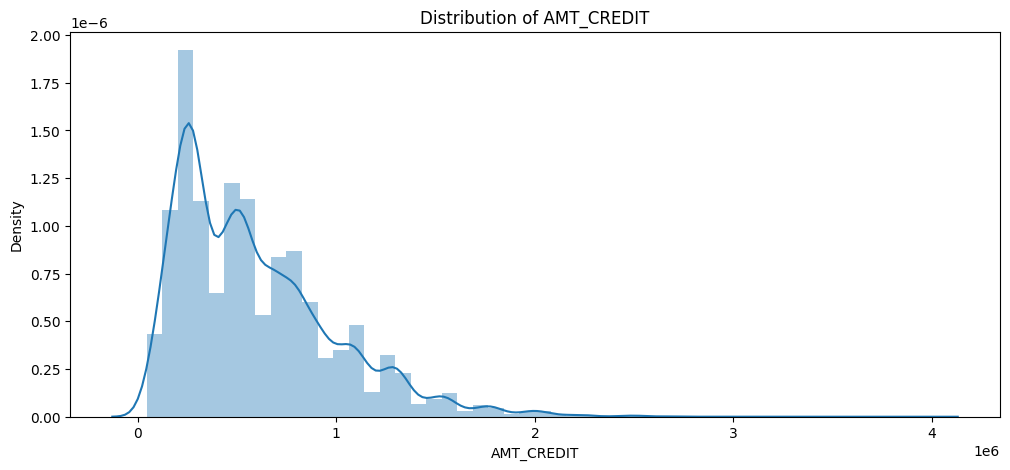

In [24]:

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app["AMT_CREDIT"])

<ipython-input-3-b9c8380aa64f>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




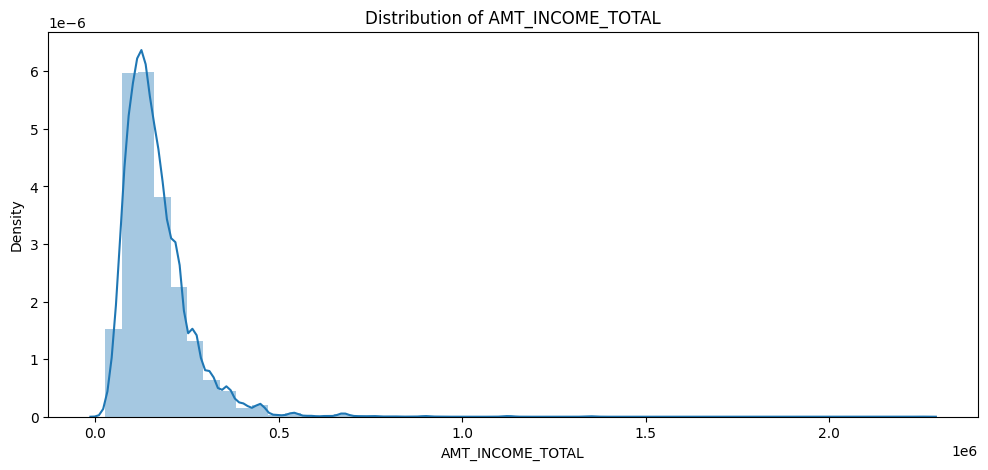

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(app["AMT_INCOME_TOTAL"].dropna())

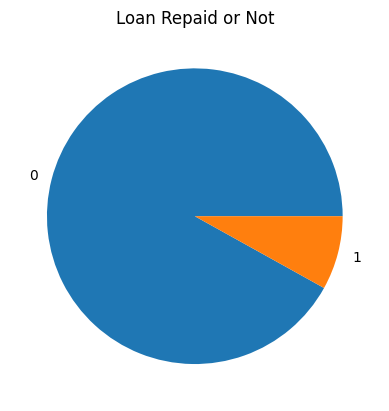

In [ ]:
temp = app["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

plt.pie(df['values'], labels=df['labels'])
plt.title('Loan Repaid or Not')
plt.show()

In [ ]:
temp = app["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)

In [ ]:
temp = app["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Family Status of Applicant\'s', hole = 0.5)

In [ ]:
temp = app["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan', color = 'green')

In [ ]:

temp = app["NAME_EDUCATION_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Education of Applicant\'s', hole = 0.5)

In [ ]:
temp = app["NAME_INCOME_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(app["TARGET"][app["NAME_INCOME_TYPE"]==val] == 1))
    temp_y0.append(np.sum(app["TARGET"][app["NAME_INCOME_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Income sources of Applicant's in terms of loan is repayed or not  in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [ ]:
temp = app["NAME_EDUCATION_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(app["TARGET"][app["NAME_EDUCATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(app["TARGET"][app["NAME_EDUCATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Education of Applicant's in terms of loan is repayed or not in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Education of Applicant\'s',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [ ]:
temp = app["NAME_HOUSING_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(app["TARGET"][app["NAME_HOUSING_TYPE"]==val] == 1))
    temp_y0.append(np.sum(app["TARGET"][application_train["NAME_HOUSING_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "For which types of house higher applicant's applied for loan in terms of loan is repayed or not in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='types of house',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [ ]:
temp = papp["NAME_CONTRACT_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Contract product type of previous application",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Contract product type",
                "x": 0.12,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [ ]:
temp = papp["WEEKDAY_APPR_PROCESS_START"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "On which day highest number of clients applied in prevoies application in % ",
    xaxis=dict(
        title='Day of the Week',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Day of Week in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

In [ ]:
temp = papp["NAME_CONTRACT_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Contract approved or not', hole = 0.5)

In [ ]:
temp = papp["CODE_REJECT_REASON"].value_counts()
temp.iplot(kind='bar', xTitle = 'Reason', yTitle = "Count", title = 'Top reasons of previous application rejection(Wriiten in some codes)', colors=['#75e575'])

In [ ]:

temp = papp["NAME_PORTFOLIO"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Was the previous application for CASH, POS, CAR, …', hole = 0.7,colors=['#ea7c96','#75e575',])

In [ ]:

temp = papp["NFLAG_INSURED_ON_APPROVAL"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Did the client requested insurance during the previous application(YES : 1, NO : 0)', hole = 0.7, colors=['#ea7c96','#75e575',])